<a href="https://colab.research.google.com/github/illyesa/Bootcamp_GENAI_Fev2025/blob/main/DailyChallengeW2D4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files

# files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download unsdsn/world-happiness
!unzip world-happiness.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 22.0MB/s]
Archive:  world-happiness.zip
replace 2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


In [29]:
import pandas as pd
df_2019 = pd.read_csv("2019.csv")
df_2019.head()
df_2019.info()
df_2019.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


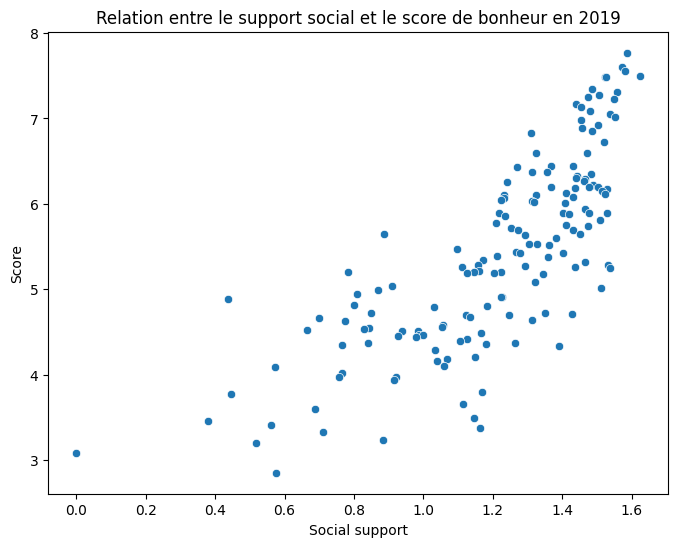

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_2019_new = df_2019.dropna()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_2019_new['Social support'], y=df_2019_new['Score'])
plt.xlabel("Social support")
plt.ylabel("Score")
plt.title("Relation entre le support social et le score de bonheur en 2019")
plt.show()


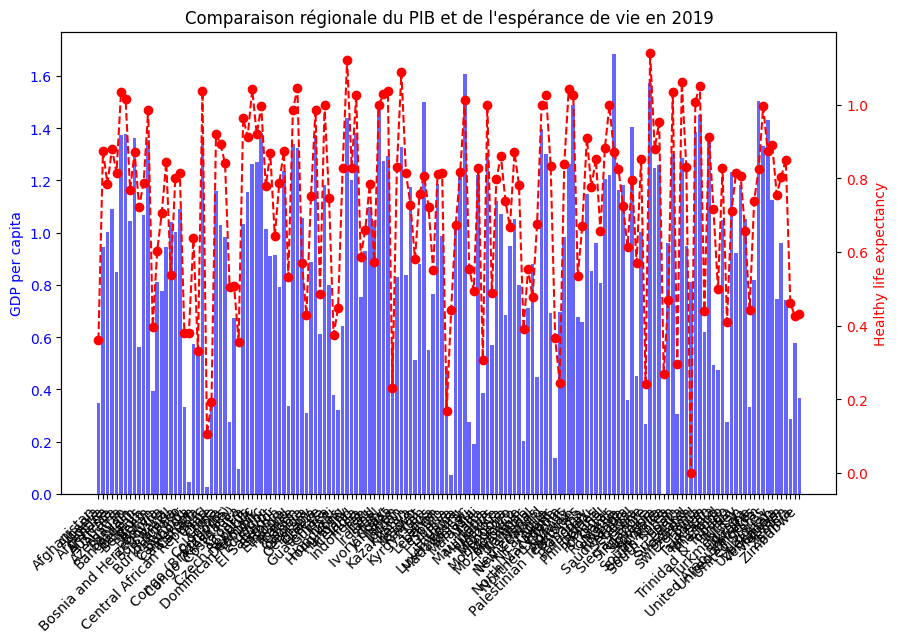

In [35]:
# Comparaison régionale du PIB et de la santé
df_region = df_2019_new.groupby('Country or region').mean()
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot pour le PIB par habitant
ax1.bar(df_region.index, df_region['GDP per capita'], color='b', alpha=0.6, label='GDP per capita')
ax1.set_ylabel("GDP per capita", color='b')
ax1.set_xticks(range(len(df_region.index)))
ax1.set_xticklabels(df_region.index, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='b')

# Axe secondaire pour l'espérance de vie en bonne santé
ax2 = ax1.twinx()
ax2.plot(df_region.index, df_region['Healthy life expectancy'], color='r', marker='o', linestyle='dashed', label='Healthy life expectancy')
ax2.set_ylabel("Healthy life expectancy", color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("Comparaison régionale du PIB et de l'espérance de vie en 2019")
plt.show()
